In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits

In [2]:
def goldenSequence(N) :
    phi = 0.5*(1+np.sqrt(5))
    x = range(N)
    return np.mod(x*phi*180,180)

In [3]:
goldenSequence(10)

array([  0.        , 111.24611797,  42.49223595, 153.73835392,
        84.9844719 ,  16.23058987, 127.47670785,  58.72282582,
       169.9689438 , 101.21506177])

In [40]:
def readImage(fname,first,last,mean = False) :
    tmp = fits.getdata(fname.format(first),ext=0)
    img = np.zeros([last-first+1,tmp.shape[0],tmp.shape[1]])
    img[0]=tmp.astype(float)
    
    for idx in np.arange(first+1,last) :
        img[idx-first]=fits.getdata(fname.format(idx+1),ext=0).astype(float)
    if mean :
        img = img.mean(axis=0)
        
    return img

In [41]:
def getSinograms(fmask,N,lines,stride=1, counts=1 ) :
    img = fits.getdata(fmask.format(1),ext=0)
    sino = np.zeros([len(lines),N,img.shape[1]])
    
    angles   = goldenSequence(N)
    angleIdx = np.argsort(angles)
    
    for idx in range(len(angleIdx)) :
        for count in range(counts) :
            fileIdx = 1 + angleIdx[idx]*stride + count
            img = fits.getdata(fmask.format(fileIdx),ext=0)
            # Normalize (Img-dc)/(ob-dc)*D0/D
            for lineIdx,line in enumerate(lines) :
                sino[lineIdx,idx] = sino[lineIdx,idx] + img[lineIdx]
                
    sino = sino / counts
    
    angles = angles[angleIdx]
    
    return sino,angles
    

In [42]:
s,angles = getSinograms('../02_rawdata/01_CTscan/bitumenCT_{0:05}.fits',N=500,lines=[100,200],stride=5,counts=1)

In [43]:
angles

array([  0.        ,   0.34548817,   0.69097634,   0.90449977,
         1.24998794,   1.80899955,   2.15448772,   2.36801115,
         2.71349932,   3.27251092,   3.61799909,   4.1770107 ,
         4.52249887,   4.7360223 ,   5.08151047,   5.64052207,
         5.98601024,   6.19953367,   6.54502185,   6.89051002,
         7.10403345,   7.44952162,   8.00853322,   8.35402139,
         8.56754482,   8.91303299,   9.4720446 ,   9.81753277,
        10.37654437,  10.72203254,  10.93555597,  11.28104414,
        11.84005575,  12.18554392,  12.39906735,  12.74455552,
        13.09004369,  13.30356712,  13.64905529,  14.2080669 ,
        14.55355507,  14.7670785 ,  15.11256667,  15.67157827,
        16.01706644,  16.23058987,  16.57607805,  16.92156622,
        17.13508965,  17.48057782,  18.03958942,  18.38507759,
        18.59860102,  18.94408919,  19.5031008 ,  19.84858897,
        20.40760057,  20.75308874,  20.96661217,  21.31210034,
        21.87111195,  22.21660012,  22.43012355,  22.77

In [33]:
np.argsort(goldenSequence(10))

array([0, 5, 2, 7, 4, 9, 1, 6, 3, 8], dtype=int64)

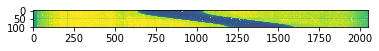

In [39]:
plt.imshow(s[0],vmin=200,vmax=1000)

In [45]:
np.save('sinogram.npy',s)
np.save('angles.npy',angles)